# IMPORTS 

In [30]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
#Imports needed
import numpy as np #For everything                              version 
import matplotlib.pyplot as plt #For visualisation              version 
import networkx as nx #For the graph                            version 
from pickle import load as pload #For loading the gpickle file  version 
from PIL import Image #For image management                     version 
from tqdm import tqdm #For nice loading bars                    version 
from declaration_tutti import load, treat_a_new_reseau, load_from_scratch
from fct_utils import prune,xy2t
from fct_analyse import arbre_genealogique_branches,color_by_time
#Our part:
from Reseau import Reseau,Brindille,Branche 
from scipy.optimize import curve_fit
from IPython.display import Image
from  functions_avoidment import vision_des_branches_alice
import math 

reseau= load('M2WT_200616',"branched")
for b in reseau.branches:
        b.n2x = reseau.n2x
        b.n2y = reseau.n2y
        b.n2t = reseau.n2t

# Change of approach: 
* Instead of taking the ones that see the obstacle, let's try the other way around to identify avoidments: Starting from the branch that change their speed drastically, ( find those whose velocity change speed) and then see if they present an obstacle during their path. 
* IF they do, get the obstacle datas. 
* Try to use the function velocity that calculates the speed vector for every instant of life of the hypha. 


In [62]:
def velocity ( branch, t):
    
    vel ,temps  = branch.positions_vitesses()[1] , branch.positions_vitesses()[2]
    t_index = np.where(temps == t)
    velocity = vel[t_index]
    return velocity

def curvature(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    d2x = np.gradient(dx)
    d2y = np.gradient(dy)
    
    numerator = dx * d2y - dy * d2x
    denominator = (dx**2 + dy**2)**(3/2)
    
    curvature = numerator / denominator
    return curvature

def extract_coordinates(arrays):
    x = [array[0] for array in arrays]
    y = [array[1] for array in arrays]
    return x, y

In [73]:
b = reseau.branches[2]
b.positions_vitesses()[1][2]
lista = b.positions_vitesses()[0]
print(len(posizioni))
posizioni = [row[:2] for row in lista]

x , y = extract_coordinates(posizioni)
K = list(curvature(x,y))     #let's try to calculate the gradient 
print(K)
maxi = np.nanmax(K)
K.index(maxi)

22
[0.0, 0.0, nan, -0.11701788643542467, 0.019883757937963223, 0.016346877072284976, 0.005338734139792135, -0.002315629459014005, -0.00048019374449251144, 0.0053523905749903195, 0.006091837231601175, 0.006876808437878314, 0.009139177258312134, 0.005392157126295599, 0.0011712856393618631, 0.0015488789814252692, 0.002726019581523842, 0.00241233104886735, 0.0012982055398755303, -0.00033287698435452754, -0.0010812602165298035, -0.0010363485299059551]


C:\Users\alice\AppData\Local\Temp\ipykernel_1720\348591308.py:17: RuntimeWarning: invalid value encountered in divide
  curvature = numerator / denominator


1

C:\Users\alice\AppData\Local\Temp\ipykernel_1720\2828409488.py:25: RuntimeWarning: invalid value encountered in scalar divide
  angle_radians = np.arccos(dot_product / (norm_v * norm_future))
C:\Users\alice\AppData\Local\Temp\ipykernel_1720\2828409488.py:26: RuntimeWarning: invalid value encountered in scalar divide
  angle_radians = np.arccos(dot_product2 / (norm_v * norm_future2))
C:\Users\alice\AppData\Local\Temp\ipykernel_1720\2828409488.py:25: RuntimeWarning: invalid value encountered in arccos
  angle_radians = np.arccos(dot_product / (norm_v * norm_future))
C:\Users\alice\AppData\Local\Temp\ipykernel_1720\2828409488.py:26: RuntimeWarning: invalid value encountered in arccos
  angle_radians = np.arccos(dot_product2 / (norm_v * norm_future2))


In [95]:
dictionaire_vitesses

{Branche 0 - 668 noeuds: {11: [-38.320862897866526, 15.328345159146611],
  51: [-11.801510934567014, 68.75662892312955]},
 Branche 2 - 223 noeuds: {12: [31.259144918788333, -10.083595135093011]},
 Branche 26 - 50 noeuds: {51: [38.93326510697117, 41.84033292931396]},
 Branche 29 - 164 noeuds: {47: [-3.0, 1.699951171875]},
 Branche 38 - 54 noeuds: {46: [-13.960553718022714, 29.5880107509054]},
 Branche 49 - 49 noeuds: {48: [35.02768930636672, -9.787148482661289]},
 Branche 50 - 204 noeuds: {42: [-26.79623382318994, 1.5312133613251395]},
 Branche 61 - 74 noeuds: {52: [-37.623136385568124, -41.18208171933808]},
 Branche 66 - 33 noeuds: {51: [-24.555625327287483, -9.822250130914993]},
 Branche 78 - 66 noeuds: {51: [-36.042488410179544, -26.397315455342767]},
 Branche 79 - 115 noeuds: {50: [39.54476972781504, -28.129724369008187],
  51: [31.29697409037564, -51.19449615503628]},
 Branche 110 - 21 noeuds: {53: [20.406871875970243, -15.3566737034858]},
 Branche 134 - 133 noeuds: {46: [-50.53747

### We took the ones that the following or the second following velocity norm vector forms an angle wider than 45 degree with the vector in analysis 

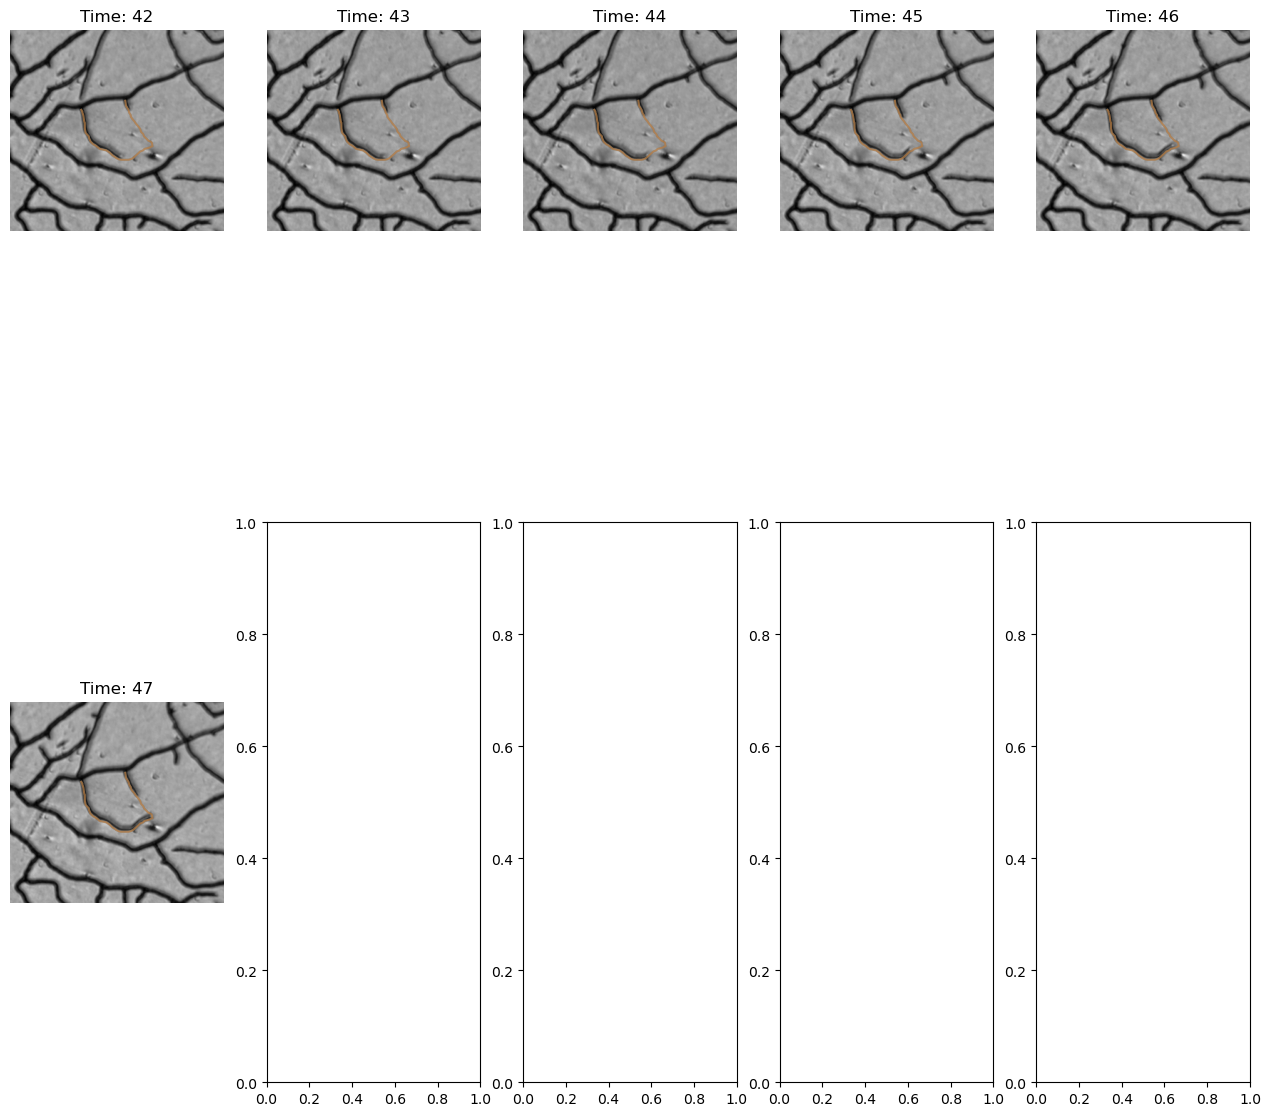